In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
#read this data
df = pd.read_csv('Titanic-Dataset[1].csv')
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# find missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# missing value handling
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#Analysis and Visualization¶


In [11]:
Survived = df['Survived'].value_counts().reset_index()
Survived.columns = ['Survived', 'Count']
Survived

,Survived,Count
0,0,549
1,1,342


<ipython-input-12-b8e51e3a91a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1');


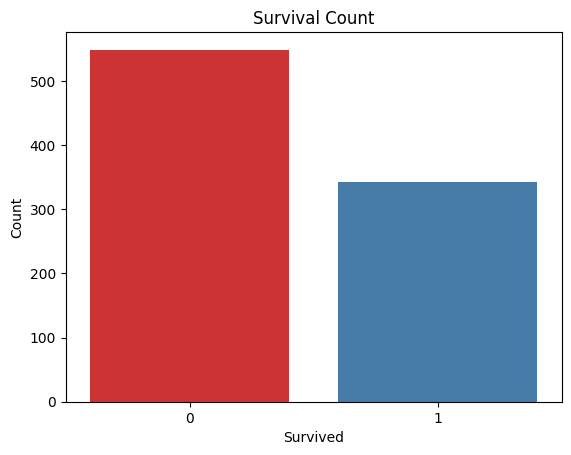

In [12]:
# visualization from Count & Survived
sns.countplot(x='Survived', data=df, palette='Set1');
plt.title('Survival Count');
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show();

<ipython-input-13-fca1403cf260>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set1');


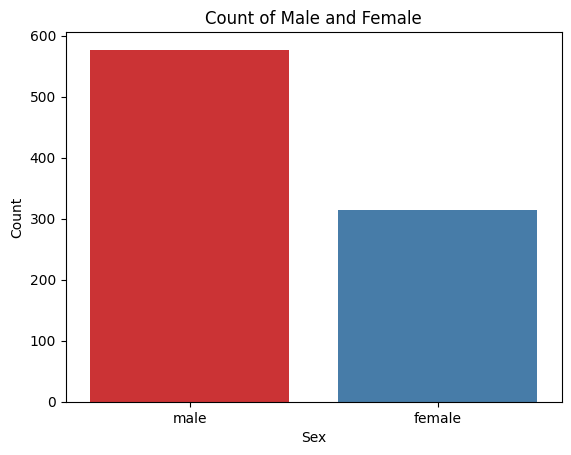

In [13]:
#The number of male and female visualization
sns.countplot(x='Sex', data=df, palette='Set1');
plt.title('Count of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

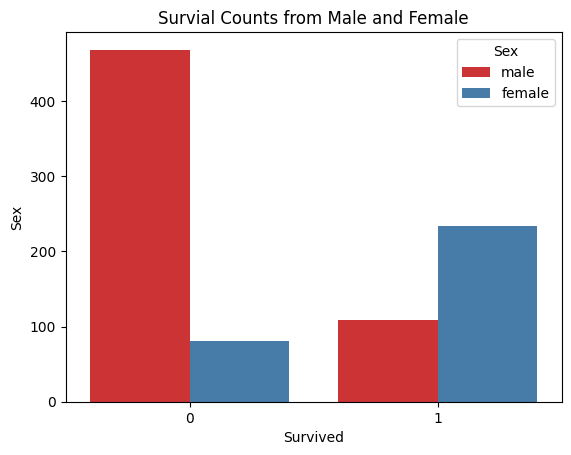

In [14]:
#Survival Counts From Male and female
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1');
plt.title('Survial Counts from Male and Female')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

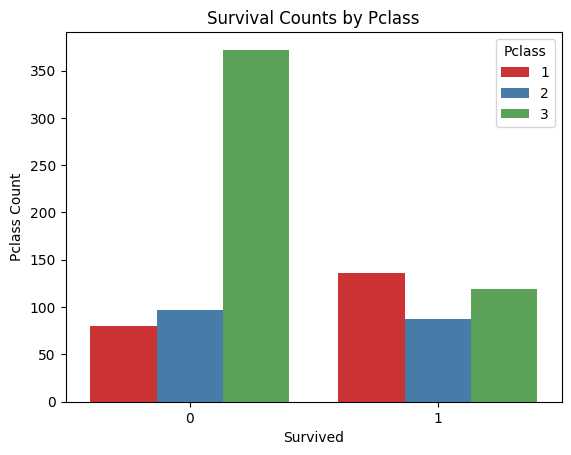

In [15]:
# visualization from pclass & Survived
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1');
plt.title('Survival Count by Pclass');
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass Count')
plt.show()

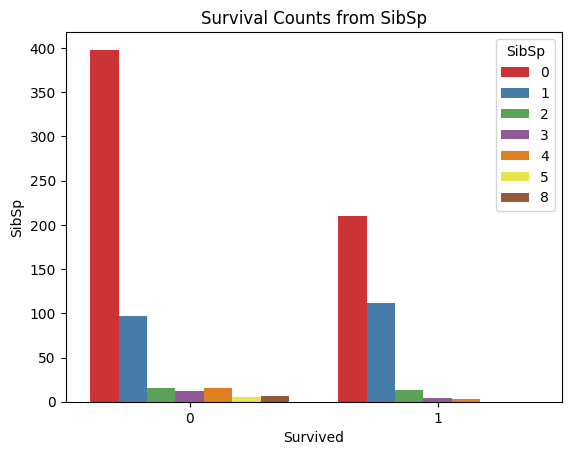

In [16]:
#Survival Counts From SibSp
sns.countplot(x='Survived', hue='SibSp', data=df, palette='Set1')
plt.title('Survival Counts from SibSp')
plt.xlabel('Survived')
plt.ylabel('SibSp')
plt.show()

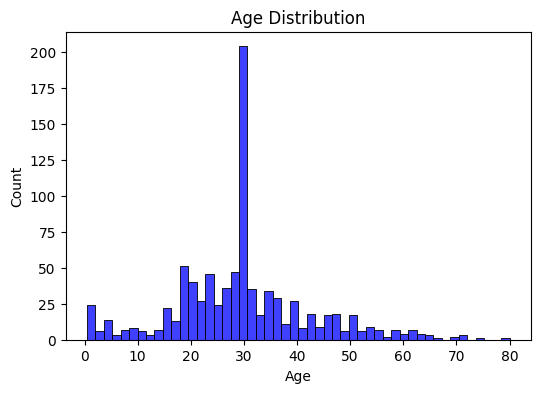

In [17]:
# histogram Visualization for Count & Age
plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['Age'],bins=50, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

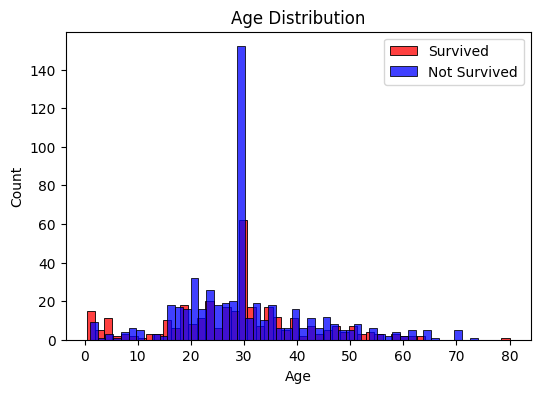

In [18]:
#Visualization for Survived & Age
plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df[df['Survived'] == 1]['Age'], bins=50, color='Red', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=50, color='Blue', label='Not Survived')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

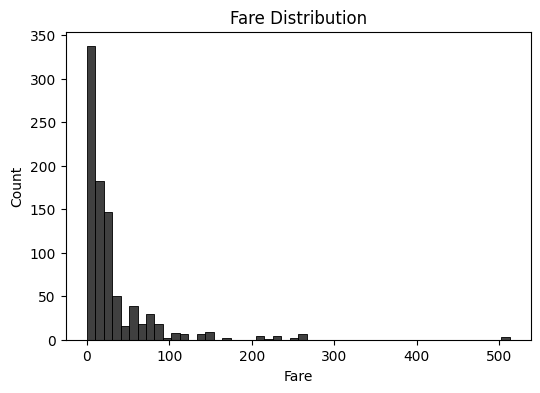

In [19]:
# histogram Visualization for Count & Fare
plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['Fare'], bins=50, color='Black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

#PreProcessing


In [20]:
# objective handling data
df.drop(['PassengerId', 'Name','Ticket', 'Cabin' ], axis=1, inplace=True)
Le = LabelEncoder()
df['Sex'] = Le.fit_transform(df['Sex'])
df['Embarked'] = Le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
#Checking the outliers
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Survived outliers = 0.00%
Column Pclass outliers = 0.00%
Column Sex outliers = 0.00%
Column Age outliers = 7.41%
Column SibSp outliers = 5.16%
Column Parch outliers = 100.00%
Column Fare outliers = 13.02%
Column Embarked outliers = 0.00%


In [22]:
# Handling the outlier for Age
# Outlier Value
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= (Q1 -2 * IQR)) & (df['Age'] <= (Q3 + 2 * IQR))]
#Parch
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Parch'] >= (Q1 -2 * IQR)) & (df['Parch'] <= (Q3 + 2 * IQR))]
# Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 2 * IQR)) & (df['Fare'] <= (Q3 + 2 * IQR)) ]

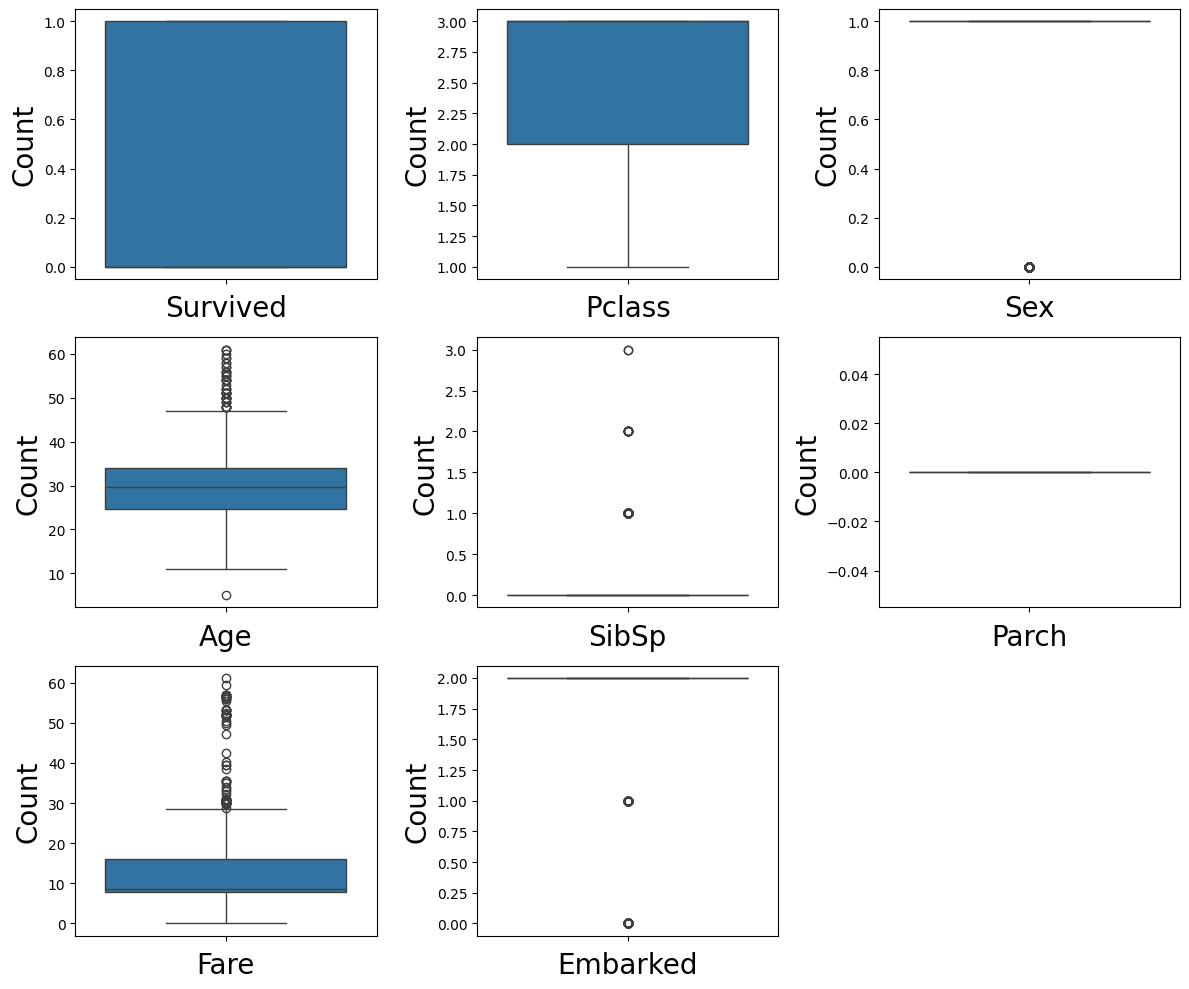

In [23]:
import warnings
warnings.filterwarnings('ignore')
#Outlier Value
plt.figure(figsize=(12, 10), dpi=100)
plotnumber=1
for column in df:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

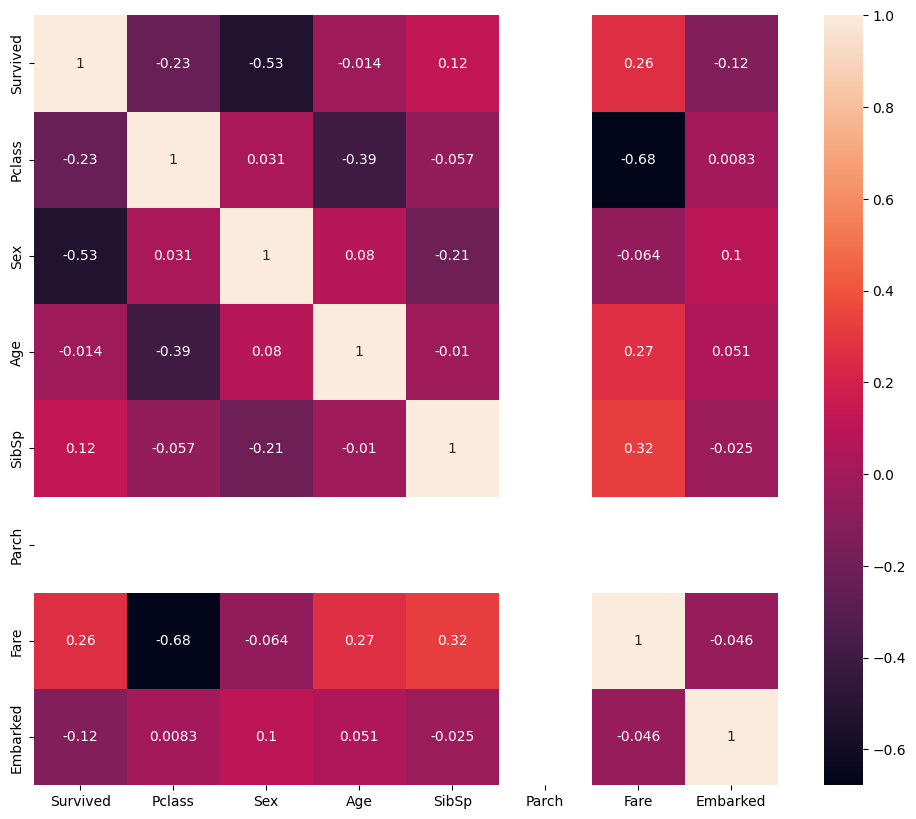

In [24]:
#corrolation data
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()

#Train Test Split


In [25]:
#train test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MinMaxScaler

In [26]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 1) Pclass                         1.684255
 2) Sex                            0.000000
 3) Age                            -0.359860
 4) SibSp                          -0.576406
 5) Parch                          -0.829331
 6) Fare                           -0.869756
 7) Embarked                       -2.551880


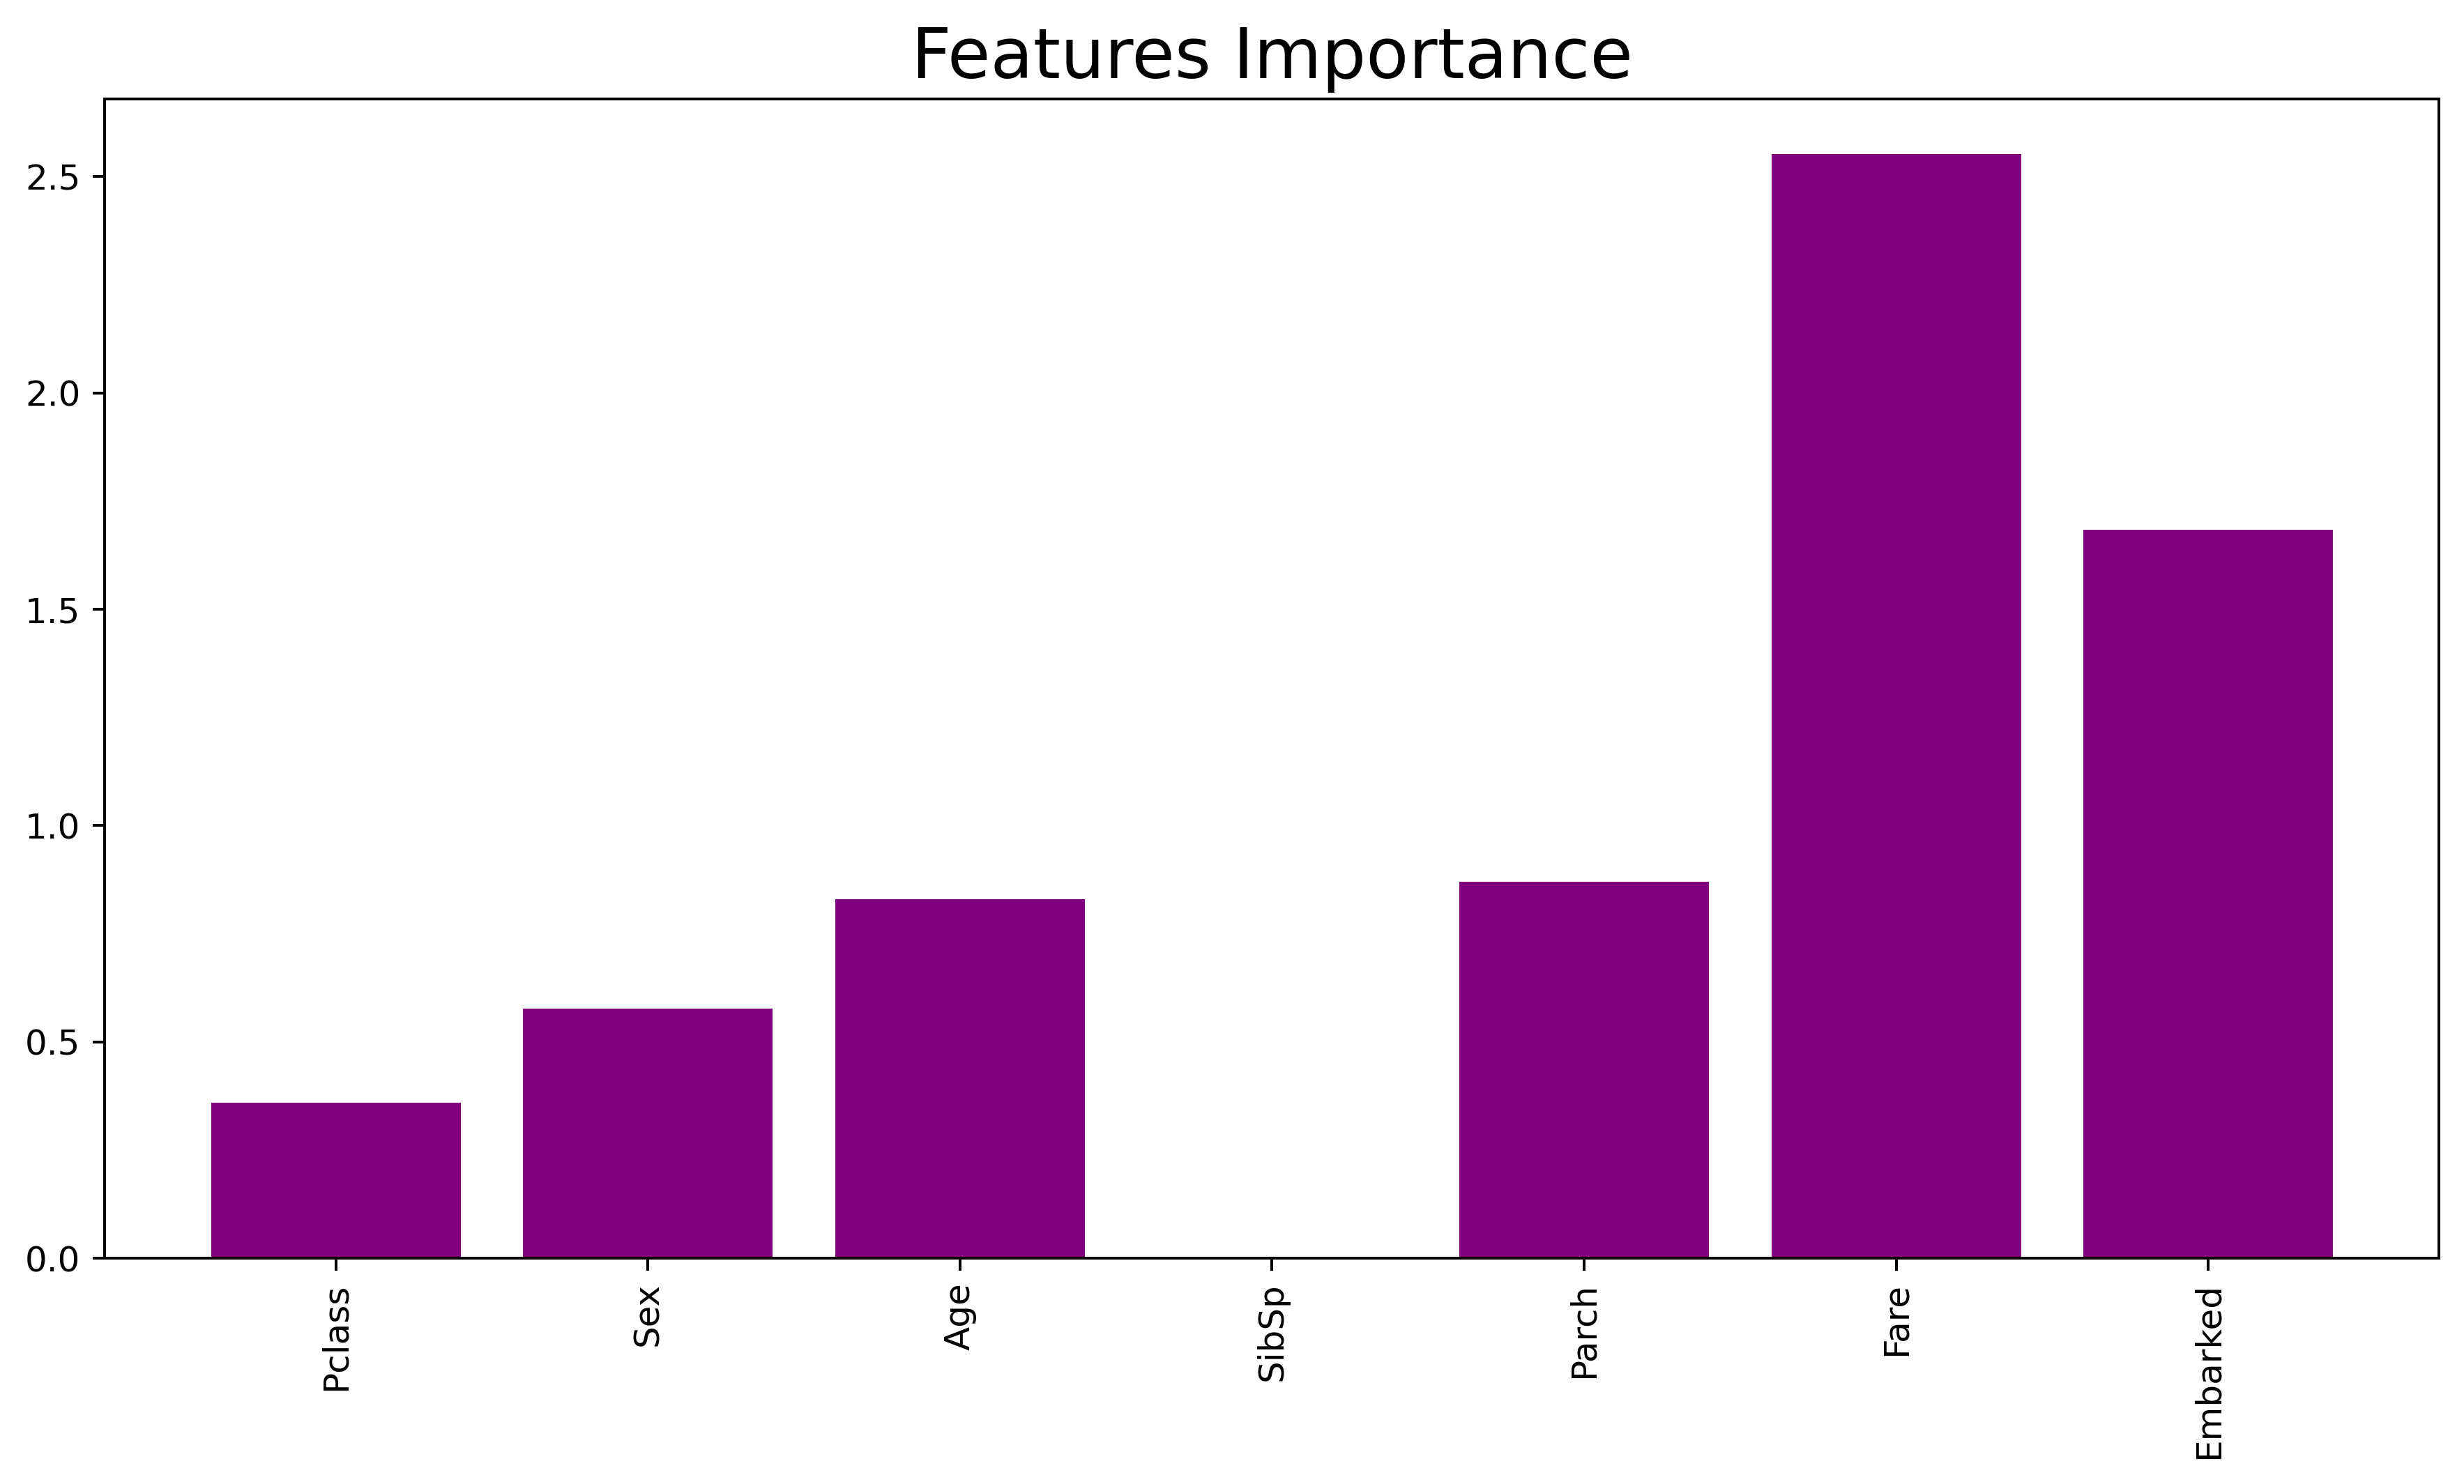

In [27]:
# Fit the logistic regression model
model = LogisticRegression() # Initialize the logistic regression model
model.fit(X_train, y_train)

# Assuming 'features_label' should be the column names of your DataFrame 'X'
features_label = X.columns

# access features importance insights (coefficients)
importances = pd.Series(model.coef_[0], index=features_label) # Access the first element of the coef_ array
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
  print("%2d) %-*s %f" %(i + 1, 30, features_label[i],importances[indices[i]]))

#sort the coefficients by absolute values to get the most influential features
importances = importances.abs().sort_values(ascending=False)

#Visualation of Features importance
import matplotlib.pyplot as plt # Import matplotlib.pyplot
plt.figure(figsize=(12, 6), dpi = 360)
plt.bar(range(X_train.shape[1]), importances[indices], color = 'purple', align= 'center')
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90, fontsize = 10)
plt.title('Features Importance', fontsize = 20)
plt.show();

#Logistic Regression Model¶


In [28]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.score(X_train, y_train)

0.8025210084033614

In [29]:
y_pred = LR.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8403361344537815


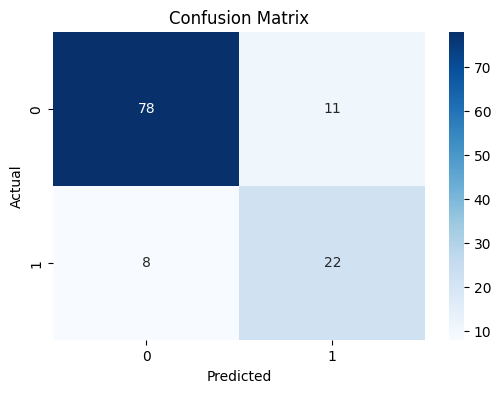

In [30]:
#ConfusionMatrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        89
           1       0.67      0.73      0.70        30

    accuracy                           0.84       119
   macro avg       0.79      0.80      0.79       119
weighted avg       0.85      0.84      0.84       119



#Decisoin Tree Classfie

In [32]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_train, y_train)

0.976890756302521

In [33]:
y_pred = DT.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7394957983193278


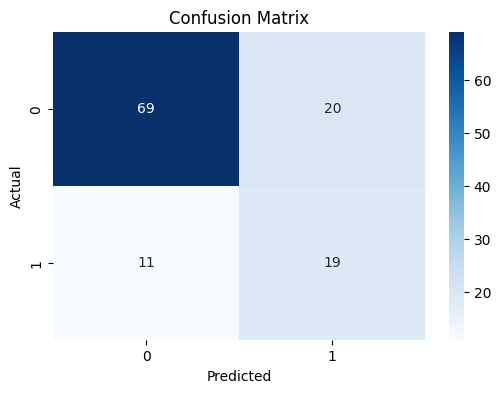

In [34]:
#ConfusionMatrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        89
           1       0.49      0.63      0.55        30

    accuracy                           0.74       119
   macro avg       0.67      0.70      0.68       119
weighted avg       0.77      0.74      0.75       119



#RandomForest

In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.976890756302521

In [37]:
y_pred = RF.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8319327731092437


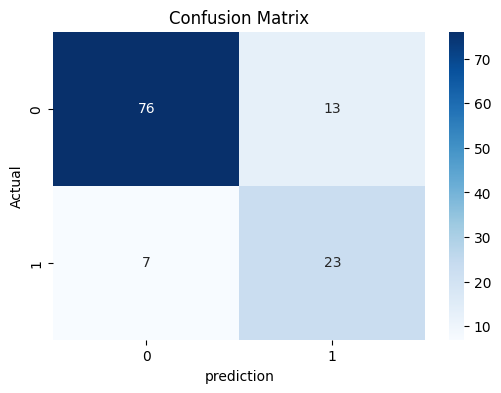

In [38]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(6,4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        89
           1       0.64      0.77      0.70        30

    accuracy                           0.83       119
   macro avg       0.78      0.81      0.79       119
weighted avg       0.85      0.83      0.84       119



#SVC

In [40]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.8046218487394958

In [41]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8403361344537815


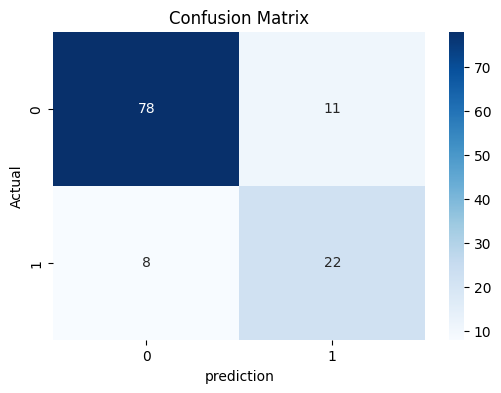

In [42]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(6,4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        89
           1       0.67      0.73      0.70        30

    accuracy                           0.84       119
   macro avg       0.79      0.80      0.79       119
weighted avg       0.85      0.84      0.84       119

